<div style="font-weight: bold; color:#5D8AA8" align="center">
    <div style="font-size: xx-large">Métodos Avanzados en Aprendizaje Automático</div><br>
    <div style="font-size: x-large; color:gray">Support Vector Machines</div><br>
    <div style="font-size: large">Carlos María Alaíz Gudín - Universidad Autónoma de Madrid</div><br></div><hr>
</div>

**Initial Configuration**

This cell defines the configuration of Jupyter Notebooks.

In [2]:
%%html
<style>
    .qst {background-color: #b1cee3; padding:10px; border-radius: 5px; border: solid 2px #5D8AA8;}
    .qst:before {font-weight: bold; content:"Exercise"; display: block; margin: 0px 10px 10px 10px;}
    h1, h2, h3 {color: #5D8AA8;}
    .text_cell_render p {text-align: justify; text-justify: inter-word;}
</style>

In [3]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

This cell imports the packages to be used (all of them quite standard except for `Utils`, which is provided with the notebook).

In [4]:
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs, make_moons, make_circles
from sklearn.svm import SVC, SVR, OneClassSVM

from Utils import plot_dataset_clas, plot_dataset
from Utils import plot_svc, plot_all_linear_separators, plot_svr

matplotlib.rc('figure', figsize=(15, 5))
seed = 123

# SVC: Multiple Hyperplanes

## Dataset

This example is simply a 2-dimensional binary classification dataset, with two clearly separable classes.

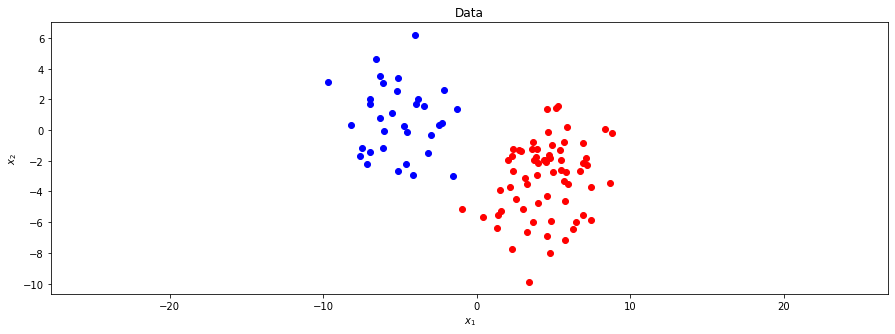

In [5]:
n_pat = 100

np.random.seed(seed)

x, y = make_blobs(n_samples=n_pat, n_features=2,
                  cluster_std=2.0, random_state=seed)
y[y != 1] = -1
plot_dataset_clas(x, y)

## Different Perfect Classifiers

There are many different hyperplanes (in this case, simply straight lines) that can be used to separate both classes.
This code represents some of them.

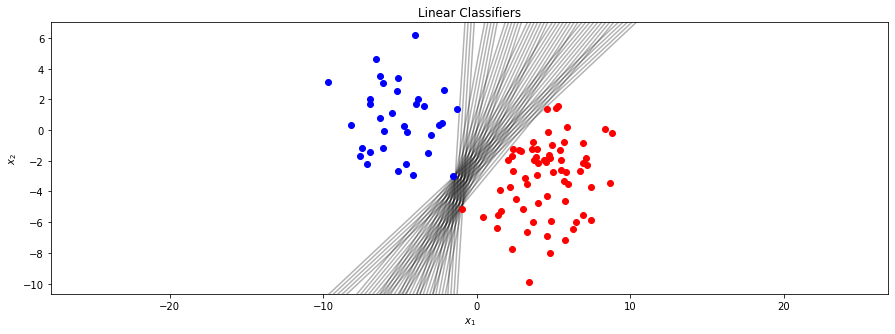

In [6]:
plot_all_linear_separators(x, y)

<div class="qst">

* Which linear model (straight line) seems the best option to separate the classes? Why?

</div>

This cell highlight the model that it is somehow "in the middle" of both classes.

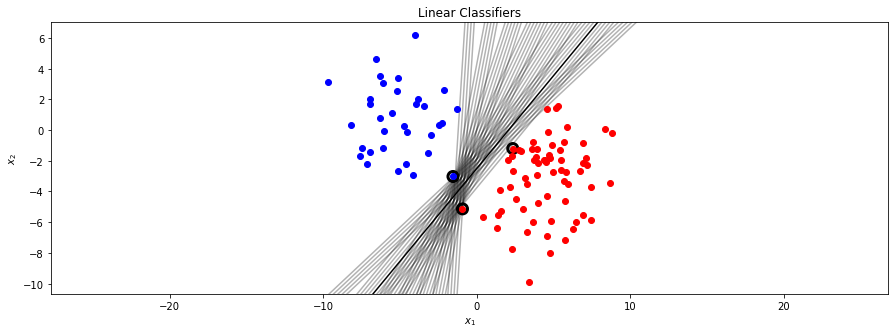

In [7]:
plot_all_linear_separators(x, y, plot_best=True)

<div class="qst">

* Does this model coincides with your intuition of the best one?
* Why do you think those three samples are circled?
* Does the model in the middle depends on any other sample, apart from these three?

</div>

# Hard-Margin SVC

## Model over the Original Data

The code below represents a Hard-Margin SVC trained over the previous dataset.
All the samples satisfy the condition $y_i (\mathbf{w}^\intercal \mathbf{x}_i + b) \ge 1$ (the borders of such conditions are the supporting hyperplanes, represented with dashed lines), and the margin is maximum.
The solid line represents the separating hyperplane.

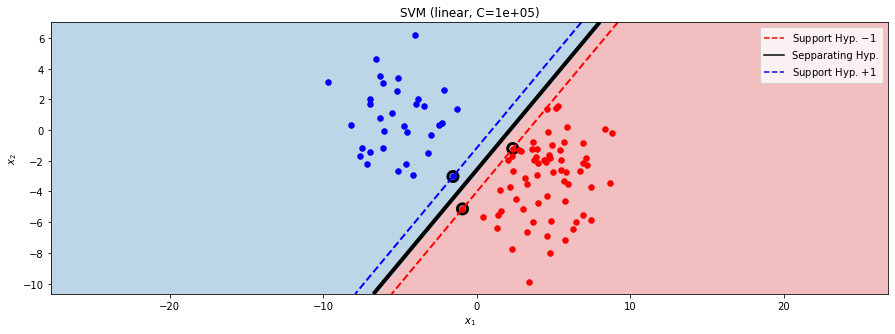

In [8]:
model = SVC(C=1e5, kernel='linear')
model.fit(x, y)

plot_svc(x, y, model)

<div class="qst">

* Why do you think those three samples are circled?
* Does the margin depends on any other sample, apart from these three?

</div>

# Hard-Margin SVC: Optimization

## Support Vectors

This cell accesses the support vectors inside the model.
According to the theory, these points should be over the supporting hyperplane (i.e., $(\mathbf{w}^\intercal \mathbf{x}_i + b) = y_i = \pm1$).

In [9]:
print("Index of support vectors:", model.support_)
print("Support vectors:\n", model.support_vectors_)
print("Prediction over the support vectors:", model.decision_function(model.support_vectors_))

Index of support vectors: [ 3 62 63]
Support vectors:
 [[ 2.35006925 -1.20198621]
 [-0.92397477 -5.13503856]
 [-1.54414824 -3.02379614]]
Prediction over the support vectors: [-1.00013407 -1.00013349  1.00026803]


<div class="qst">

* Does these support vectors coincide with the circled points of the previous plot?
* Check the prediction of the model over the support vectors. Does this match the theory?

</div>

## Recovering the Primal Solution

In order to recover the primal hyperplane, the following equation can be used:
$$ \mathbf{w} = \sum_{i = 1}^N y_i \alpha_i \mathbf{x}_i . $$
Moreover, since for a support vector $(\mathbf{w}^\intercal \mathbf{x}_i + b) = y_i$, then the bias $b$ can be recovered from any support vector as:
$$ b = y_i - \mathbf{w} \mathbf{x}_i .$$

The following cell recovers the primal linear model $\{b, \mathbf{w}\}$ from the dual variables (it should be noted that the coefficients `model.dual_coef_` correspond already to $y_i \alpha_i$).
These primal variables can also be accessed directly through `model.coef_` and `model.intercept_`.

In [10]:
w = model.dual_coef_[0] @ model.support_vectors_
print("Primal hyperplane (computed):    ", w)
print("Primal hyperplane (from sklearn):", model.coef_[0])

b = y[model.support_] - x[model.support_, :] @ w
print("")
print("Primal bias (computed from every support vector):", b)
print("Primal bias (from sklearn):                      ", model.intercept_)

Primal hyperplane (computed):     [-0.84133089  0.70036032]
Primal hyperplane (from sklearn): [-0.84133089  0.70036032]

Primal bias (computed from every support vector): [1.81900932 1.81900874 1.81860722]
Primal bias (from sklearn):                       [1.81887525]


<div class="qst">

* Does this code match the theory?
* Is the primal model being recovered correctly?

</div>

## Training the Model over the Additional Data

The SVMs are sparse models, based only on certain samples (the support vectors), which are located intuitively near the other class.
The following cell adds six additional points to the original dataset, but far away from the border.

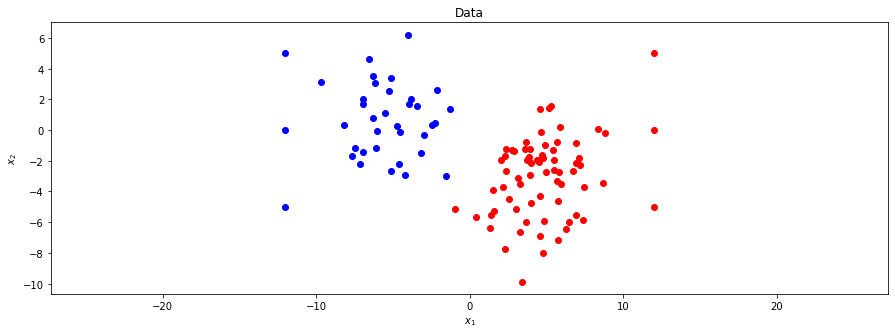

In [11]:
x_ext = np.vstack((x, np.array([[-12, 0], [12, 0], [-12, -5], [12, -5], [-12, 5], [12, 5]])))
y_ext = np.append(y, [1, -1, 1, -1, 1, -1])

plot_dataset_clas(x_ext, y_ext)

<div class="qst">

* Do you think that these points will affect the model? Why?

</div>

This cells trains another SVM over the modified dataset.

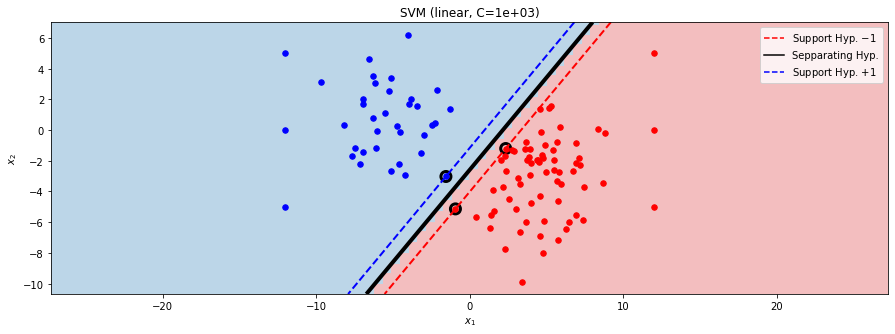

In [12]:
model = SVC(C=1e3, kernel='linear')
model.fit(x_ext, y_ext)

plot_svc(x_ext, y_ext, model)

<div class="qst">

* Is the model different from the previous one? Why?

</div>

# Soft-Margin SVC

## Dataset

In the following dataset an overlapping between classes is allowed.

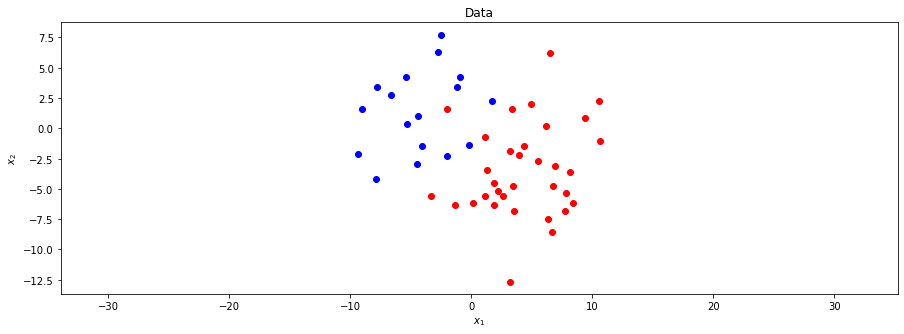

In [13]:
n_pat = 50

np.random.seed(seed)

x, y =  make_blobs(n_samples=n_pat, n_features=2, cluster_std=3.0, random_state=seed)
y[y != 1] = -1
plot_dataset_clas(x, y)

<div class="qst">

* Are both classes still linearly separable?

</div>

## Model

A Soft-Margin SVC is trained over this dataset.
The slack variables (distance to the corresponding supporting hyperplane) are also represented as dotted lines.

The hyper-parameter $C$ is controlled by the variable `C`.

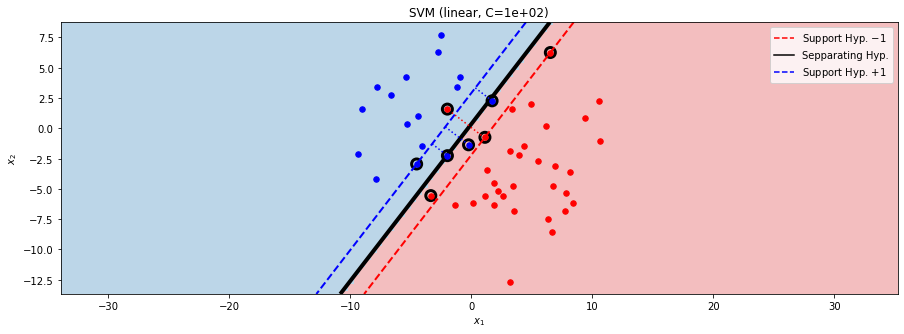

In [14]:
model = SVC(C=1e2, kernel='linear')
model.fit(x, y)

plot_svc(x, y, model, plot_slack=True)

<div class="qst">

* Are all the points correctly classified?
* The slack variables can be larger than $0$ even if the point is still correctly classified. Can you distinguish this on the plot?
* According to the theory, the support vectors are either over the corresponding supporting hyperplane or on the wrong side of it. Can this be seen in the plot?
* Try different values of $C$ like $10^{-2}$ and $10^{2}$.
    - How does the margin change?
    - How does the training error change?

</div>

# SVR

## Dataset

This cell generates a regression dataset.

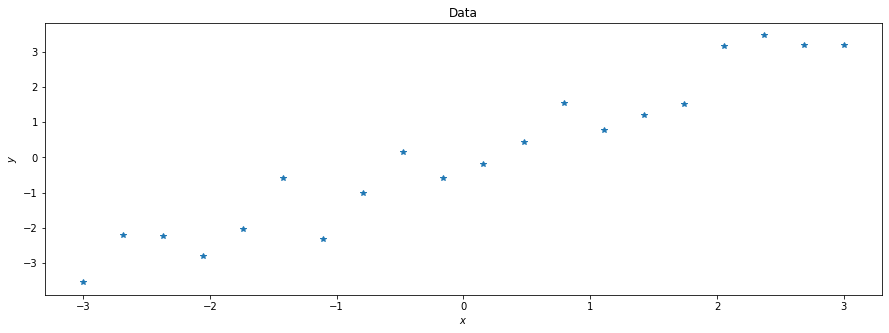

In [15]:
n_pat = 20
noise = 5e-1

np.random.seed(seed)

x = np.linspace(-3, 3, n_pat)
y = x + noise * np.random.randn(n_pat)

plot_dataset(x, y)

<div class="qst">

* Is the problem (approximately) linear?

</div>

## Model

This cell trains an SVR over the previous dataset, and depicts it.
The support vectors (those outside the $\epsilon$-insensitive curve, or in the border) are the circled samples. The slack variables (distance to the $\epsilon$-insensitive tube) are represented as dotted lines.

The hyper-parameter $\epsilon$ is controlled by the variable `epsilon`, and $C$ by the variable `C`.

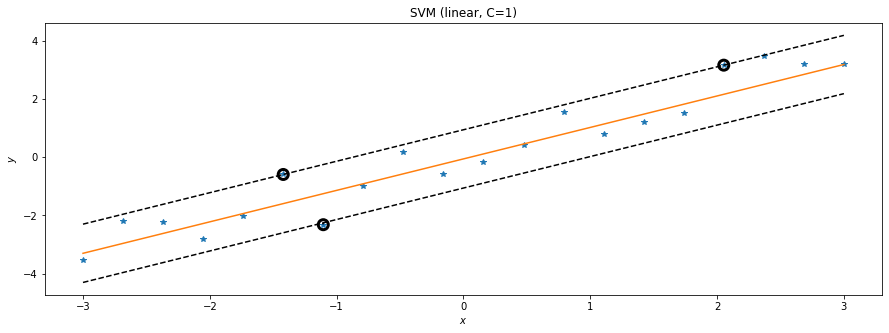

In [16]:
model = SVR(epsilon=1e0, C=1e0, kernel='linear')
model.fit(x.reshape(-1, 1), y)

plot_svr(x, y, model, plot_slack=True)
plt.show()

<div class="qst">

* Try to change the value of $C$ to $10^{-2}$ and $10^{2}$. Is it possible to induce over-fitting? Why? Notice that in this case the model is still linear.
* What happens when you decrease the value of $\epsilon$ to $10^{-2}$? And when you increase it to $10^{1}$? Why?

</div>

# SVR: Optimization

## Support Vectors

This cell accesses the support vectors inside the model.
According to the theory, these points should be over or outside the $\epsilon$-insensitive tube (i.e., $| y_i - (\mathbf{w}^\intercal \mathbf{x}_i + b) | \ge \epsilon$).

In [17]:
print("Index of support vectors:", model.support_)
print("Support vectors:\n", model.support_vectors_)
print("Prediction over the support vectors:", model.predict(model.support_vectors_))
print("Residual of the prediction over the support vectors:", y[model.support_] - model.predict(model.support_vectors_))
print("Value of epsilon:", model.epsilon)

Index of support vectors: [ 5  6 16]
Support vectors:
 [[-1.42105263]
 [-1.10526316]
 [ 2.05263158]]
Prediction over the support vectors: [-1.59533436 -1.25434063  2.15559672]
Residual of the prediction over the support vectors: [ 1.         -1.06426215  0.9999999 ]
Value of epsilon: 1.0


<div class="qst">

* Does these support vectors coincide with the circled points of the previous plot?
* Check the prediction of the model over the support vectors. Does this match the theory?

</div>

## Recovering the Primal Solution

In order to recover the primal hyperplane, the following equation can be used:
$$ \mathbf{w} = \sum_{i = 1}^N (\alpha^*_i - \alpha_i) \mathbf{x}_i . $$
In this case, it is slightly more involved to compute the value of $b$, so it will be omitted.

The following cell recovers the primal hyperplane $\mathbf{w}$ from the dual variables (it should be noted that the coefficients `model.dual_coef_` correspond already to $\alpha^*_i - \alpha_i$).
This primal variable can also be accessed directly through `model.coef_`.

In [18]:
w = model.dual_coef_[0] @ model.support_vectors_
print("Primal hyperplane (computed):    ", w)
print("Primal hyperplane (from sklearn):", model.coef_[0])

Primal hyperplane (computed):     [1.07981349]
Primal hyperplane (from sklearn): [1.07981349]


<div class="qst">

* Does this code match the theory?
* Is the primal model being recovered correctly?

</div>

# OC-SVM

## Dataset

This cell generates a regression dataset.

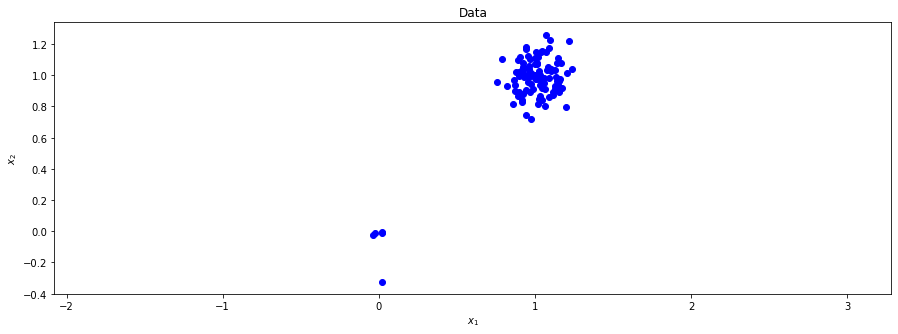

In [19]:
n_pat = 100
n_out = 5

np.random.seed(seed)

x = 1e-1 * np.random.randn(n_pat - n_out, 2) + 1
x = np.vstack((x, 1e-1 * np.random.randn(n_out, 2) ))
y = np.ones(n_pat)
plot_dataset_clas(x, y)

<div class="qst">

* Is it possible to detect the outliers by hand?

</div>

## Model

This cell trains a OC-SVM over the previous dataset, and depicts it.
The support vectors are the circled samples. The slack variables are represented as dotted lines.

The hyper-parameter $\nu$ is controlled by the variable `nu`.

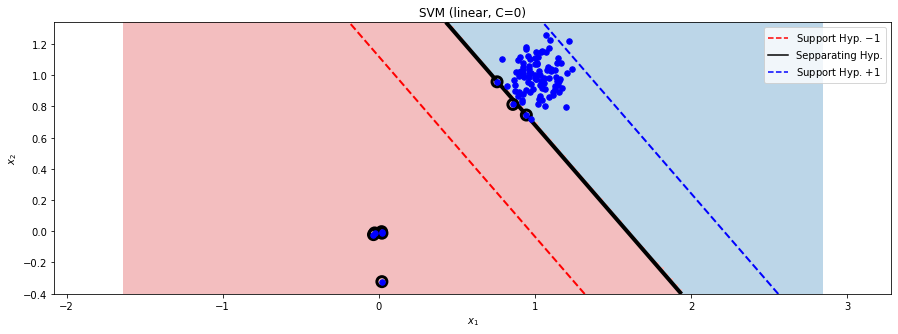

In [20]:
model = OneClassSVM(kernel='linear', nu=0.07)

model.fit(x)

plot_svc(x, y, model)

<div class="qst">

* Try to change the value of $\nu$ to $0.01$, $0.1$ and $0.9$. What is the effect? Notice that in this case the model is still linear.

</div>

# OC-SVM: Optimization

## Support Vectors

This cell accesses the support vectors inside the model.
According to the theory, these points should satisfy $\mathbf{w}^\intercal \mathbf{x}_i - \rho \le 0$.

In [21]:
print("Index of support vectors:", model.support_)
print("Support vectors:\n", model.support_vectors_)
print("Prediction over the support vectors:", model.decision_function(model.support_vectors_))

Index of support vectors: [ 3 76 92 95 96 97 98 99]
Support vectors:
 [[ 0.75733208  0.95710874]
 [ 0.85881111  0.81231313]
 [ 0.94513579  0.74429454]
 [ 0.01771923 -0.0029968 ]
 [ 0.01995821 -0.01261178]
 [ 0.01970189 -0.3231055 ]
 [-0.02692935 -0.01108507]
 [-0.03412617 -0.02179463]]
Prediction over the support vectors: [-5.34963901e-03 -4.41174020e-02 -1.49998796e-08 -2.54001344e+00
 -2.54984324e+00 -2.98427340e+00 -2.62331382e+00 -2.64988857e+00]


<div class="qst">

* Does these support vectors coincide with the circled points of the previous plot?
* Check the prediction of the model over the support vectors. Does this match the theory?

</div>

## Recovering the Primal Solution

In order to recover the primal hyperplane, the following equation can be used:
$$ \mathbf{w} = \sum_{i = 1}^N \alpha_i \mathbf{x}_i . $$

The following cell recovers the primal hyperplane $\mathbf{w}$ from the dual variables.
This primal variable can also be accessed directly through `model.coef_`.

In [22]:
w = model.dual_coef_[0] @ model.support_vectors_
print("Primal hyperplane (computed):    ", w)
print("Primal hyperplane (from sklearn):", model.coef_[0])

Primal hyperplane (computed):     [1.612467   1.39782809]
Primal hyperplane (from sklearn): [1.612467   1.39782809]


<div class="qst">

* Does this code match the theory?
* Is the primal model being recovered correctly?

</div>

# Non-Linear SVC

## Dataset

The following cell generates a 2-dimensional classification dataset.

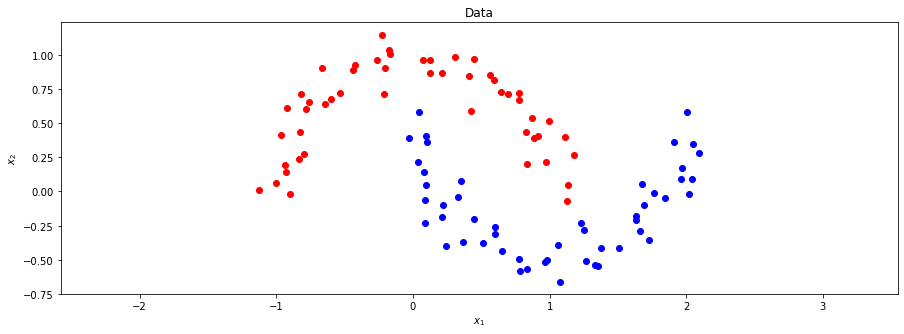

In [23]:
n_pat = 100
noise = 0.1

np.random.seed(seed)

x, y = make_moons(n_samples=n_pat, noise=noise, random_state=seed)
y[y == 0] = -1
plot_dataset_clas(x, y)

<div class="qst">

* Is the dataset linearly separable?

</div>

## Linear Model

The code below trains a linear SVM over the previous problem.

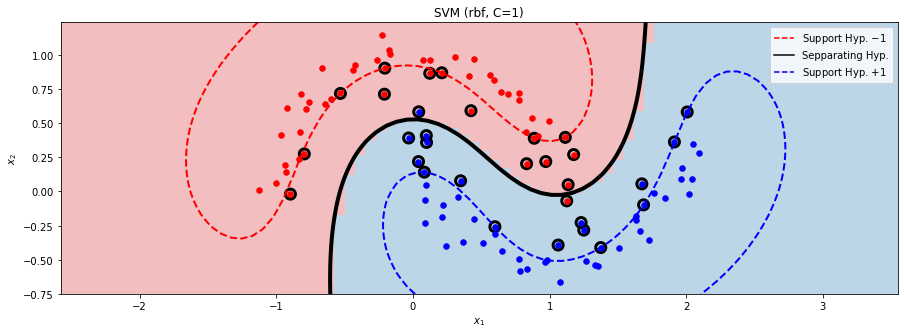

In [24]:
model = SVC(kernel='rbf')
model.fit(x, y)

plot_svc(x, y, model)

<div class="qst">

* How does the previous model perform?

</div>

## Non-Linear Model

This cell trains a non-linear SVM with RBF kernel, where the parameter of the kernel $\gamma$ is given by the variable `gamma`.

/home/oscar/Escritorio/MUCD/MUCD-MAAA/Oscar/3- SVM/Utils.py:431: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, np.sign(zz), shading='flat', cmap=colors.ListedColormap([alpha * col_2 + 1 - alpha, alpha * col_1 + 1 - alpha]))


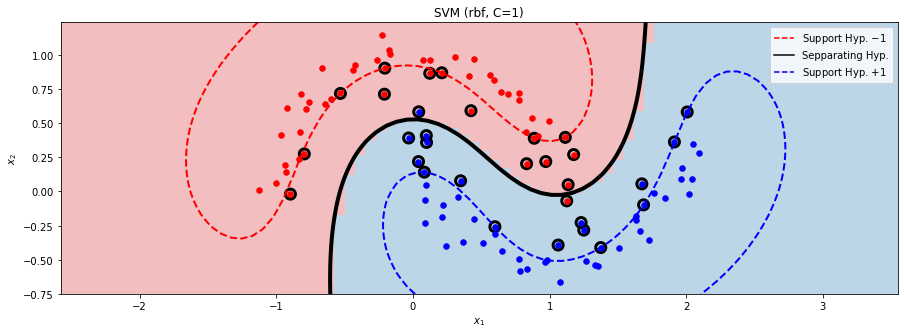

In [61]:
model = SVC(kernel='rbf', gamma='scale', C=1e0)
model.fit(x, y)

plot_svc(x, y, model)

<div class="qst">

* How does it perform?
* Try modifying the value of $C$ to $10^{-2}$ and $10^2$. Is the model under-fitting or over-fitting the data?

</div>

# Non-Linear SVR

## Dataset

This cell generates a regression dataset.

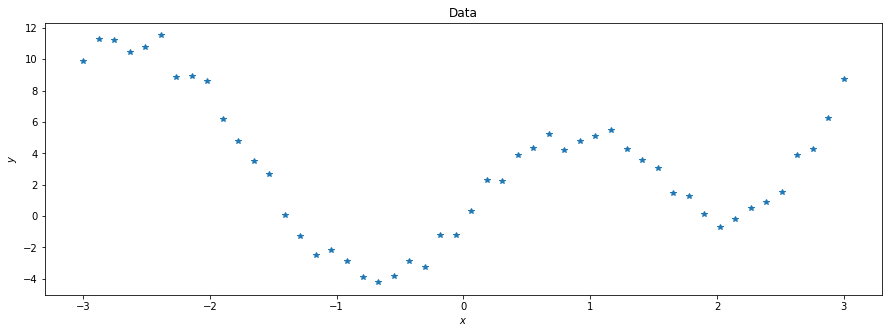

In [62]:
n_pat = 50
noise = 5e-1

np.random.seed(seed)

x = np.linspace(-3, 3, n_pat)
y = x**2 + 5 * np.sin(2 * x) + noise * np.random.randn(n_pat)

plot_dataset(x, y)

<div class="qst">

* Is the problem (approximately) linear?

</div>

## Linear Model

The code below trains a linear SVM over the previous problem.

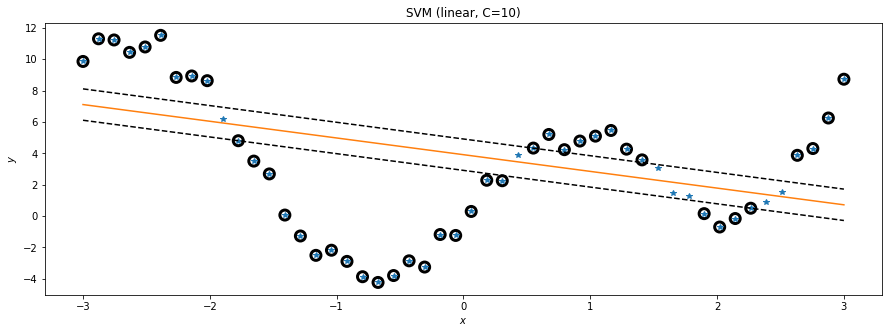

In [63]:
model = SVR(kernel='linear', epsilon=1e0, C=1e1)
model.fit(x.reshape(-1, 1), y)

plot_svr(x, y, model)

<div class="qst">

* How does the previous model perform?

</div>

## Non-Linear Model

This cell trains a non-linear SVM with RBF kernel, where the parameter of the kernel $\gamma$ is given by the variable `gamma`.

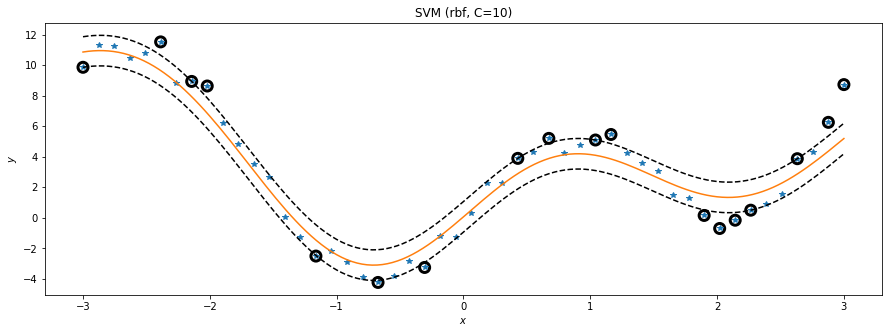

In [67]:
model = SVR(kernel='rbf', epsilon=1e0, C=1e1, gamma='scale')
model.fit(x.reshape(-1, 1), y)

plot_svr(x, y, model)

<div class="qst">

* How does the previous model perform?
* Try modifying the value of $C$ to $10^{-2}$ and $10^2$. Is the model under-fitting or over-fitting the data?

</div>

# Non-Linear OC-SVM

## Dataset

This cell generates a regression dataset.

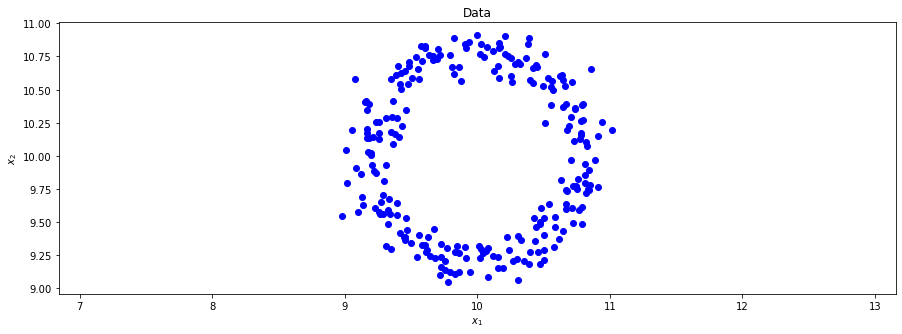

In [68]:
n_pat = 500

np.random.seed(seed)

x, y =  make_circles(n_samples=n_pat, noise=1e-1, random_state=seed)
x = x[y == 1] + 10
y = y[y == 1]
plot_dataset_clas(x, y)

<div class="qst">

* Is the dataset linear?

</div>

## Linear Model

The code below trains a linear OC-SVM over the previous problem.

/home/oscar/Escritorio/MUCD/MUCD-MAAA/Oscar/3- SVM/Utils.py:431: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, np.sign(zz), shading='flat', cmap=colors.ListedColormap([alpha * col_2 + 1 - alpha, alpha * col_1 + 1 - alpha]))


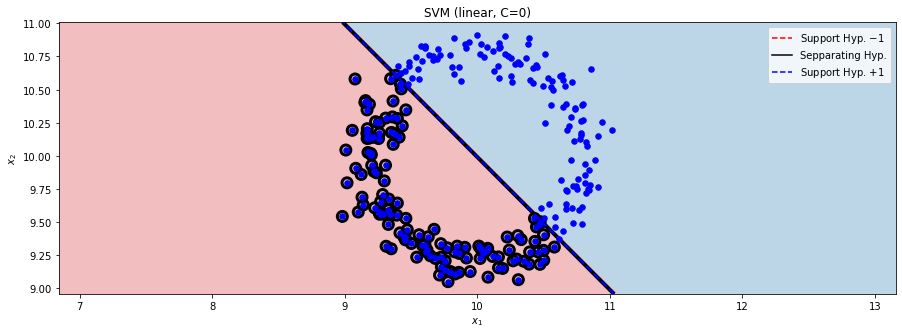

In [69]:
model = OneClassSVM(kernel='linear', nu=0.5)

model.fit(x)

plot_svc(x, y, model)

<div class="qst">

* How does the previous model perform?
* Does it model correctly the dataset?

</div>

## Non-Linear Model

This cell trains a non-linear OC-SVM with RBF kernel, where the parameter of the kernel $\gamma$ is given by the variable `gamma`.

/home/oscar/Escritorio/MUCD/MUCD-MAAA/Oscar/3- SVM/Utils.py:431: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, np.sign(zz), shading='flat', cmap=colors.ListedColormap([alpha * col_2 + 1 - alpha, alpha * col_1 + 1 - alpha]))


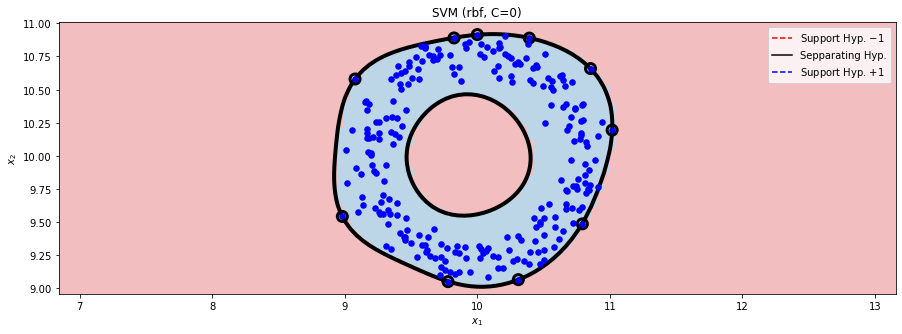

In [70]:
model = OneClassSVM(kernel='rbf', gamma='scale',nu=0.01)

model.fit(x)

plot_svc(x, y, model)

<div class="qst">

* How does the previous model perform?
* Try modifying the value of $nu$ to $0.01$, $0.1$ and $0.9$. Is the model under-fitting or over-fitting the data distribution?    

</div>